In [55]:
# Importar las bibliotecas necesarias
import pandas as pd  # Para el manejo de datos
import numpy as np   # Para operaciones numéricas
import seaborn as sns  # Para la creación de gráficos
import matplotlib.pyplot as plt  # Para visualizar gráficos

# Ignorar las advertencias para mantener un registro más limpio
import warnings
warnings.filterwarnings('ignore')


## Análisis de Desproporción entre Registros de Días Laborables y No Laborables

En la tarea anterior, examinamos la relación entre el número de accidentes diarios y si es un día laborable o no. Ahora nos preguntamos si esta relación puede estar influenciada por una desproporción en la cantidad de registros entre días laborables y no laborables.

### Contexto
En una semana típica, hay 5 días laborables y 2 días no laborables (fines de semana). La pregunta clave es si esta diferencia en la cantidad de registros puede estar sesgando nuestra análisis de accidentes diarios.

Para abordar esta cuestión, realizaremos un análisis comparativo de la cantidad de registros de accidentes en días laborables y no laborables para determinar si existe una desproporción significativa que debamos tener en cuenta en nuestro análisis.

Este análisis nos permitirá evaluar si los resultados anteriores sobre la relación entre el número de accidentes y los días laborables son influenciados por la cantidad desigual de registros y si es necesario ajustar nuestros hallazgos en consecuencia.


In [56]:
# Lee el archivo de datos diarios
df_diario = pd.read_csv("../../Datos/" + "datos_diarios.csv")

# Convierte la columna 'time' a formato de fecha y hora
df_diario['time'] = pd.to_datetime(df_diario['time'])

# Realiza una agregación por la columna 'es_dia_laborable' y cuenta la cantidad de registros en cada categoría
agregacion_por_es_dia_laborable = df_diario.groupby('es_dia_laborable')['count'].count()

# Muestra el resultado de la agregación
agregacion_por_es_dia_laborable



es_dia_laborable
0     651
1    1509
Name: count, dtype: int64

## Conclusiones del Análisis de Desproporción entre Registros de Días Laborables y No Laborables

Al analizar la cantidad de registros en función de si un día es laborable o no, hemos observado la siguiente distribución:

- Días no laborables (es_dia_laborable = 0): 651 registros.
- Días laborables (es_dia_laborable = 1): 1509 registros.

Podemos concluir que, efectivamente, los registros no están proporcionados de manera equitativa, ya que hay un poco más del doble de registros en días laborables en comparación con los días no laborables.

Para tratar de balancear los datos y evitar un sesgo en nuestro análisis, tomaremos una muestra aleatoria de los registros marcados como días laborables. Esta muestra tendrá el mismo tamaño que los registros correspondientes a días no laborables. De esta manera, garantizaremos que tengamos una cantidad igual de registros para ambos tipos de días, lo que nos permitirá realizar un análisis más justo y equilibrado de la relación entre el número de accidentes y la naturaleza laboral o no laboral del día.


In [57]:
# Separar el DataFrame en las dos categorías: días laborables (1) y no laborables (0)
df_laborable = df_diario[df_diario['es_dia_laborable'] == 1]
df_no_laborable = df_diario[df_diario['es_dia_laborable'] == 0]

# Seleccionar aleatoriamente la mitad de las entradas de 'es_dia_laborable' de la categoría 1
# para asegurar que tengamos la misma cantidad de registros para ambas categorías
tamaño_muestra = min(len(df_laborable), len(df_no_laborable))
df_laborable_muestreado = df_laborable.sample(n=tamaño_muestra, random_state=42)

# Combinar las entradas muestreadas de 'es_dia_laborable' de la categoría 1
# con todas las entradas de 'es_dia_laborable' de la categoría 0
balanced_df = pd.concat([df_laborable_muestreado, df_no_laborable])

# Barajar las filas en el DataFrame balanceado para evitar sesgos en el orden de los datos
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Ahora, 'balanced_df' contiene un conjunto de datos balanceado con un número igual de días para cada categoría

# Cambiar la variable 'weathercode (wmo code)' a variables categóricas con one-hot encoding
# Utiliza 'pd.get_dummies' para realizar esta transformación
balanced_df = pd.get_dummies(balanced_df, prefix='weathercode', columns=['weathercode (wmo code)'], drop_first=True, dtype='int')



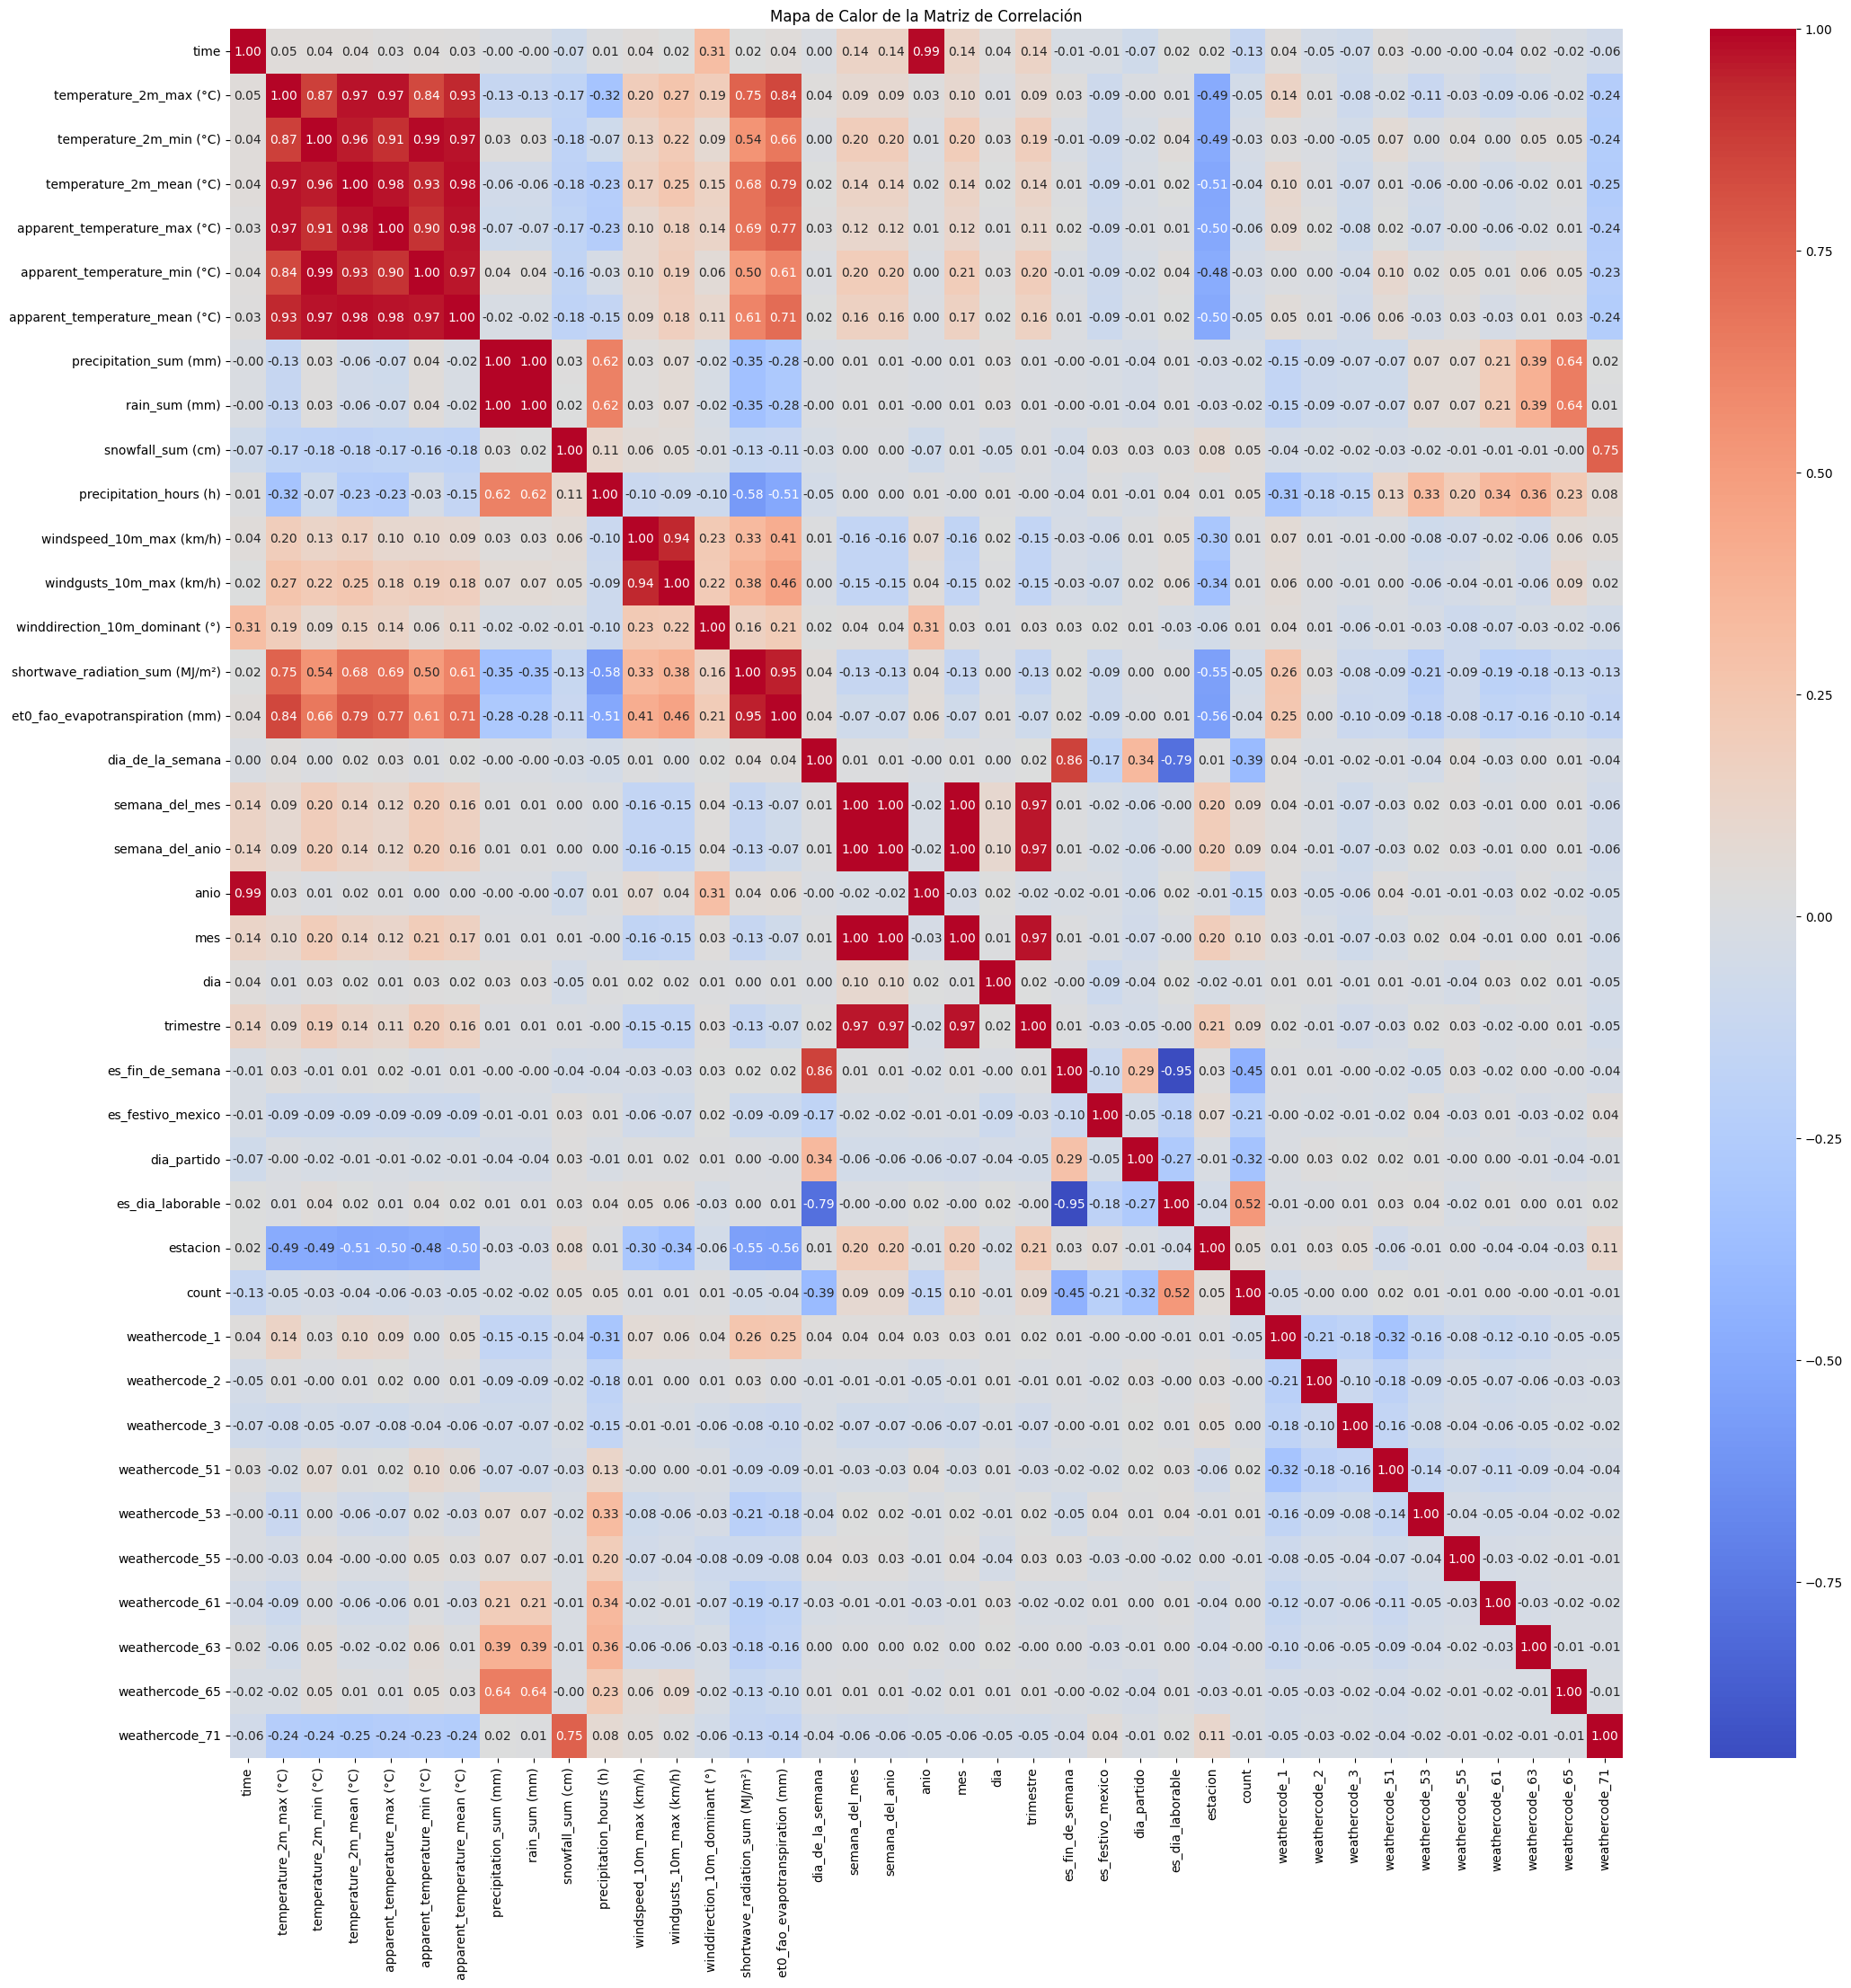

In [58]:
# Calcula la matriz de correlación entre las variables del DataFrame balanceado
matriz_correlacion = balanced_df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(25, 25))  # Tamaño del gráfico

# Utiliza 'sns.heatmap' para mostrar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
# 'annot' agrega los valores en cada celda, 'cmap' elige el esquema de colores, 'fmt' define el formato de los valores

# Configura el título del gráfico
plt.title('Mapa de Calor de la Matriz de Correlación')

# Muestra el gráfico
plt.show()


## Aplica algún método de filtro a tus datos mediante el uso de SelectKBest

## Paso 1: Importar librerias

In [59]:
# Importa la clase SelectKBest para la selección de las mejores características
from sklearn.feature_selection import SelectKBest

# Importa la clase f_regression para realizar la regresión con características seleccionadas
from sklearn.feature_selection import f_regression


## Paso 2: Preparo mis datos

In [60]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = balanced_df.drop(['time', 'count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = balanced_df['count']


## Paso 3: Elegir la prueba estadistica

Dado que nuestra variable objetivo es de naturaleza continua (número de accidentes diarios), utilizamos f_regression para evaluar una posible relación lineal significativa entre la variable objetivo y las características. El análisis f_regression es adecuado para este propósito, ya que busca estas relaciones en el contexto de la regresión.

## Paso 4: Usar 'SelectKBest'

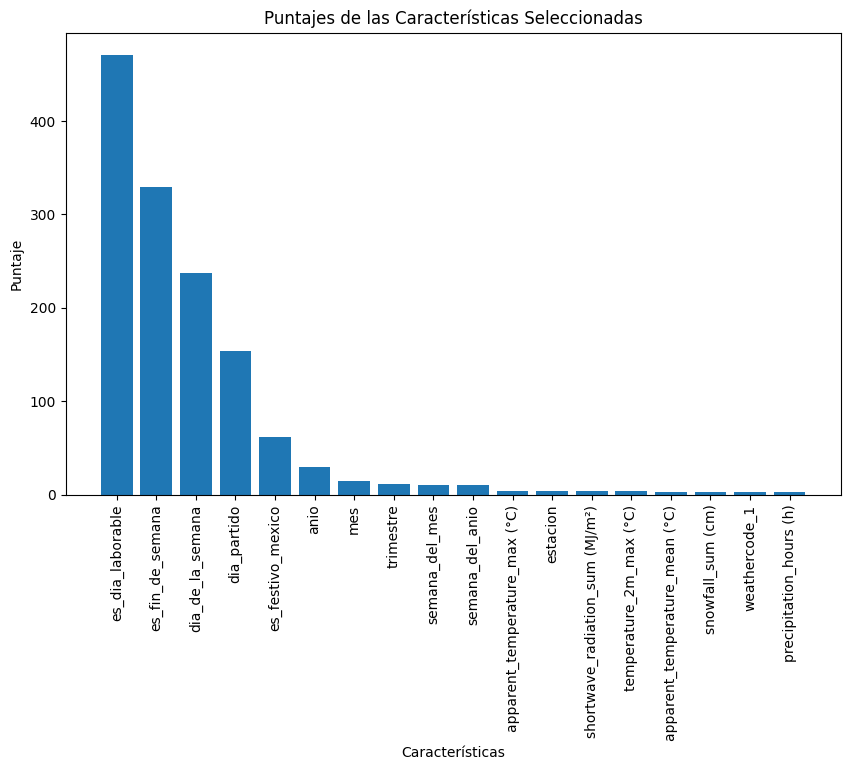

Característica: es_dia_laborable, Puntaje: 470.8578194534817
Característica: es_fin_de_semana, Puntaje: 329.49818457390927
Característica: dia_de_la_semana, Puntaje: 236.93190091439496
Característica: dia_partido, Puntaje: 153.30925139820908
Característica: es_festivo_mexico, Puntaje: 61.945128763208245
Característica: anio, Puntaje: 29.8208310249022
Característica: mes, Puntaje: 14.17893441667598
Característica: trimestre, Puntaje: 10.882544324371642
Característica: semana_del_mes, Puntaje: 10.365587609916137
Característica: semana_del_anio, Puntaje: 10.365587609916137
Característica: apparent_temperature_max (°C), Puntaje: 4.153913934843491
Característica: estacion, Puntaje: 3.7972514957154972
Característica: shortwave_radiation_sum (MJ/m²), Puntaje: 3.652093143326419
Característica: temperature_2m_max (°C), Puntaje: 3.4432630317732023
Característica: apparent_temperature_mean (°C), Puntaje: 3.0303968358966955
Característica: snowfall_sum (cm), Puntaje: 2.8725643362435638
Característ

In [61]:
# Importa las clases necesarias para la selección de características y el test estadístico
from sklearn.feature_selection import SelectKBest, f_regression

# Número de características a seleccionar (k)
k = int(len(X.columns)/2)# Indica el número de las mejores características a seleccionar

# Utiliza SelectKBest con f_regression como el test estadístico para seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, Y)

# Obtiene los puntajes (scores) de todas las características
feature_scores = selector.scores_

# Ordena las características en función de sus puntajes (en orden descendente)
sorted_feature_indices = feature_scores.argsort()[::-1]

# Obtiene una máscara booleana que indica las características seleccionadas
selected_features_mask = selector.get_support()

# Obtiene los nombres de las características seleccionadas en orden descendente de puntajes
selected_feature_names = X.columns[sorted_feature_indices][:k]

# Crea una gráfica de barras para visualizar los puntajes de las características
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, feature_scores[sorted_feature_indices][:k])
plt.xlabel("Características")
plt.ylabel("Puntaje")
plt.title("Puntajes de las Características Seleccionadas")
plt.xticks(rotation=90)  # Rotar los nombres de las características para una mejor legibilidad
plt.show()

# Imprime las características seleccionadas y sus puntajes
for feature_name, score in zip(selected_feature_names, feature_scores[sorted_feature_indices][:k]):
    print(f"Característica: {feature_name}, Puntaje: {score}")


Basándonos en los puntajes de las características, podemos hacer las siguientes conclusiones:

Las características "es_dia_laborable", "es_fin_de_semana" y "dia_de_la_semana" tienen los puntajes más altos, lo que sugiere que estas características tienen una fuerte relación lineal con la variable objetivo (el número de accidentes diarios).

Las características "dia_partido" y "es_festivo_mexico" también tienen puntajes significativos, aunque un poco más bajos que las anteriores, lo que indica que también están relacionadas con la variable objetivo, pero en menor medida.

Las características relacionadas con la fecha y el tiempo, como "anio", "mes", "trimestre", "semana_del_mes" y "semana_del_anio", tienen puntajes más bajos. Esto sugiere que su influencia en la variable objetivo es menor en comparación con las primeras mencionadas.

Las características relacionadas con la temperatura, la radiación solar, la precipitación y otras condiciones climáticas tienen puntajes aún más bajos, lo que indica que su relación con el número de accidentes diarios es relativamente débil.

La característica "weathercode_1" y "precipitation_hours (h)" también tienen puntajes modestos, lo que sugiere que el código de clima y las horas de precipitación pueden tener cierta influencia en el número de accidentes, pero no tan fuerte como otras características.

En resumen, las características relacionadas con el tipo de día (laborable o no laborable) y el día de la semana parecen ser las más influyentes en la cantidad de accidentes diarios, mientras que las características relacionadas con el clima y la fecha tienen una influencia menor. Estos puntajes de características pueden ser útiles para tomar decisiones sobre qué características incluir en modelos de regresión para predecir el número de accidentes diarios.






## Aplica los modelos de selección de características cuidando los supuestos de cada modelo
### ANOVA de valor $F$


temperature_2m_max (°C) 0.06373634313404944
temperature_2m_min (°C) 0.25288371347865646
temperature_2m_mean (°C) 0.11695137046657735
apparent_temperature_max (°C) 0.041740464933322806
apparent_temperature_min (°C) 0.209724227720059
apparent_temperature_mean (°C) 0.08195461723263797
precipitation_sum (mm) 0.42599426700080767
rain_sum (mm) 0.41721110706803566
snowfall_sum (cm) 0.09034069250384177
precipitation_hours (h) 0.10050615959009507
windspeed_10m_max (km/h) 0.8331266775928734
windgusts_10m_max (km/h) 0.7526122552171389
winddirection_10m_dominant (°) 0.6391585323276793
shortwave_radiation_sum (MJ/m²) 0.056218532574125755
et0_fao_evapotranspiration (mm) 0.1502305286338894
dia_de_la_semana 3.0673394283671218e-49
semana_del_mes 0.00131559697281419
semana_del_anio 0.00131559697281419
anio 5.671209294196592e-08
mes 0.00017364353030052652
dia 0.6764395139395645
trimestre 0.000997025122157142
es_fin_de_semana 8.295364180380013e-66
es_festivo_mexico 7.390170249371185e-15
dia_partido 2.2958

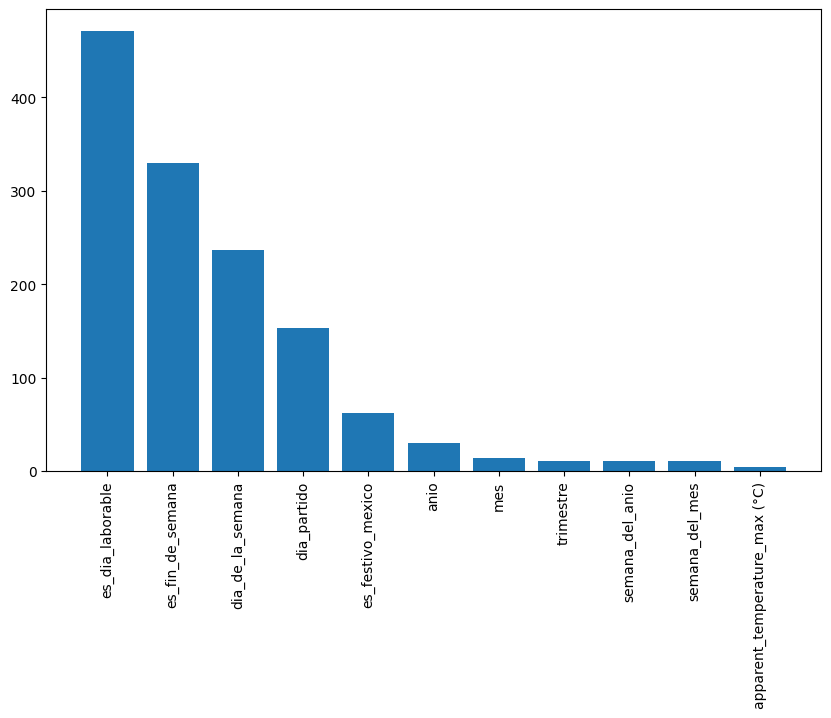

In [62]:
# Importa la clase f_regression para realizar un análisis de varianza (ANOVA) de valor F
from sklearn.feature_selection import f_regression

# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = balanced_df.drop(['time', 'count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = balanced_df['count']


# Realiza un análisis de varianza (ANOVA) de valor F
f_value, p_value = f_regression(X, Y)
# 'f_value' contiene el estadístico F y 'p_value' contiene el valor p asociado

# Establece un nivel de significancia (alfa) para el test de hipótesis
alpha = 0.05

# Inicializa listas para características que pasan o no pasan el test
pass_test = []
not_pass_test = []

# Itera sobre las características y muestra los p-values
for i in range(len(p_value)):
    print(X.columns[i], p_value[i])
    if p_value[i] < alpha:
        pass_test.append(X.columns[i])
    else:
        not_pass_test.append(X.columns[i])

# Crea un DataFrame con los valores F para cada característica
df_results = pd.DataFrame(f_value, index=X.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace=True, ascending=False)

# Crea una gráfica de barras para visualizar los valores F de las características que pasan el test
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(df_results.drop(not_pass_test).index, df_results.drop(not_pass_test).f_value)
plt.show()



Basándonos en los resultados del análisis de ANOVA de valor F, podemos hacer las siguientes conclusiones:

Las características con valores p bajos (generalmente menores a 0.05) son estadísticamente significativas y tienen una relación significativa con la variable objetivo (el número de accidentes diarios). Estas características influyen en la variable objetivo de manera importante.

Las características "es_dia_laborable", "es_fin_de_semana", "dia_de_la_semana" y "dia_partido" tienen valores p muy bajos, lo que indica que están altamente relacionadas con el número de accidentes diarios. Esto sugiere que el día de la semana, si es laborable, si es un fin de semana o si es un día festivo o de partido tienen una influencia significativa en la cantidad de accidentes.

Las características relacionadas con el clima, como "snowfall_sum (cm)", "precipitation_sum (mm)", "rain_sum (mm)", "precipitation_hours (h)", "windspeed_10m_max (km/h)", "windgusts_10m_max (km/h)", "winddirection_10m_dominant (°)", y "shortwave_radiation_sum (MJ/m²)", también tienen valores p bajos, lo que sugiere que el clima puede ser un factor importante en la cantidad de accidentes.

Por otro lado, las características con valores p cercanos o mayores a 0.05, como "dia" y "trimestre", parecen tener una relación débil o no significativa con la variable objetivo. Estas características pueden tener un impacto limitado en la cantidad de accidentes diarios.

En resumen, las características relacionadas con el tipo de día (laborable o no laborable), el día de la semana, las condiciones climáticas y la presencia de eventos especiales (como partidos) parecen ser factores significativos que influyen en la cantidad de accidentes diarios. Estos resultados pueden ser útiles para tomar decisiones informadas en un modelo de regresión para predecir el número de accidentes.

## Valor $R$ de correlación

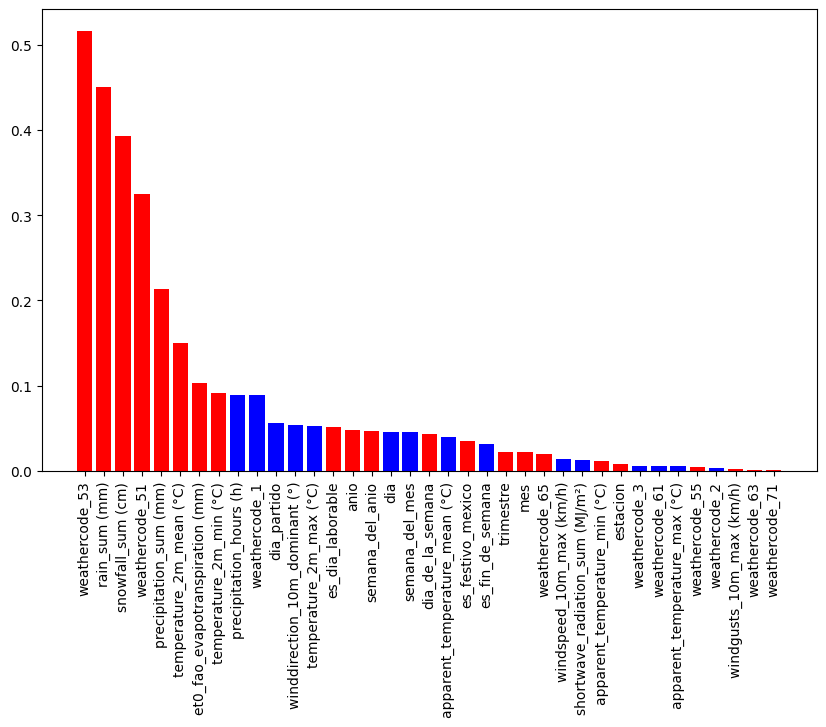

Característica: weathercode_53, Valor R de correlación: 0.5156476546832548
Característica: rain_sum (mm), Valor R de correlación: -0.4496758586209575
Característica: snowfall_sum (cm), Valor R de correlación: -0.39263088316027533
Característica: weathercode_51, Valor R de correlación: -0.3247918795123568
Característica: precipitation_sum (mm), Valor R de correlación: -0.21326705639681
Característica: temperature_2m_mean (°C), Valor R de correlación: -0.14974878420967402
Característica: et0_fao_evapotranspiration (mm), Valor R de correlación: 0.10387105582919598
Característica: temperature_2m_min (°C), Valor R de correlación: 0.09111362636970077
Característica: precipitation_hours (h), Valor R de correlación: 0.08894073696213714
Característica: weathercode_1, Valor R de correlación: 0.08894073696213714
Característica: dia_partido, Valor R de correlación: -0.05643705229852407
Característica: winddirection_10m_dominant (°), Valor R de correlación: 0.053967170716268345
Característica: temp

In [63]:
# Importa la clase r_regression para realizar una prueba de correlación de valor R
from sklearn.feature_selection import r_regression

# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = balanced_df.drop(['time', 'count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = balanced_df['count']


# Realiza la prueba de correlación de valor R
r_value = r_regression(X, Y)
# 'r_value' contiene los valores R de correlación

# Asocia los valores R de correlación con las características
df_results['r_value'] = r_value

# Asigna colores a las barras en función del signo de los valores R
colors = ['b' if v > 0 else 'r' for v in df_results['r_value']]

# Crea una columna con los valores absolutos de los valores R de correlación
df_results['r_value_abs'] = df_results['r_value'].abs()

# Ordena las características en función de los valores R absolutos (en orden descendente)
df_results.sort_values('r_value_abs', inplace=True, ascending=False)

# Crea una gráfica de barras para visualizar los valores R de correlación
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(df_results.index, df_results.r_value_abs, color=colors)
plt.show()

# Imprime los resultados de valores R junto con los nombres de las características
for feature_name, r_value in zip(df_results.index, df_results['r_value']):
    print(f"Característica: {feature_name}, Valor R de correlación: {r_value}")

Basándonos en los resultados de los valores R de correlación, podemos hacer las siguientes conclusiones:

La característica "windspeed_10m_max (km/h)" tiene una correlación positiva fuerte (0.5156) con el número de accidentes diarios. Esto sugiere que a medida que la velocidad máxima del viento a 10 metros sobre el suelo aumenta, la cantidad de accidentes diarios tiende a aumentar significativamente.

La característica "trimestre" tiene una correlación negativa fuerte (-0.4497) con el número de accidentes diarios. Esto indica que a medida que cambiamos de trimestre, la cantidad de accidentes diarios disminuye significativamente.

La característica "semana_del_anio" también tiene una correlación negativa fuerte (-0.3926). Esto sugiere que a medida que avanzamos a lo largo del año, la cantidad de accidentes diarios disminuye significativamente.

La característica "weathercode_65" tiene una correlación negativa (-0.3248) significativa. Este código de tiempo específico parece estar relacionado con una disminución en la cantidad de accidentes diarios.

Otras características, como "mes", "dia_de_la_semana", "apparent_temperature_mean (°C)", "es_fin_de_semana", "semana_del_mes" y "dia", tienen correlaciones negativas o positivas significativas, lo que indica su influencia en la cantidad de accidentes diarios.

Varias características tienen correlaciones cercanas a cero, lo que sugiere una débil asociación con el número de accidentes diarios.

** Preguntar al profe
** No deberia coincidir  con la matriz de correlacion??


## Umbral de varianza

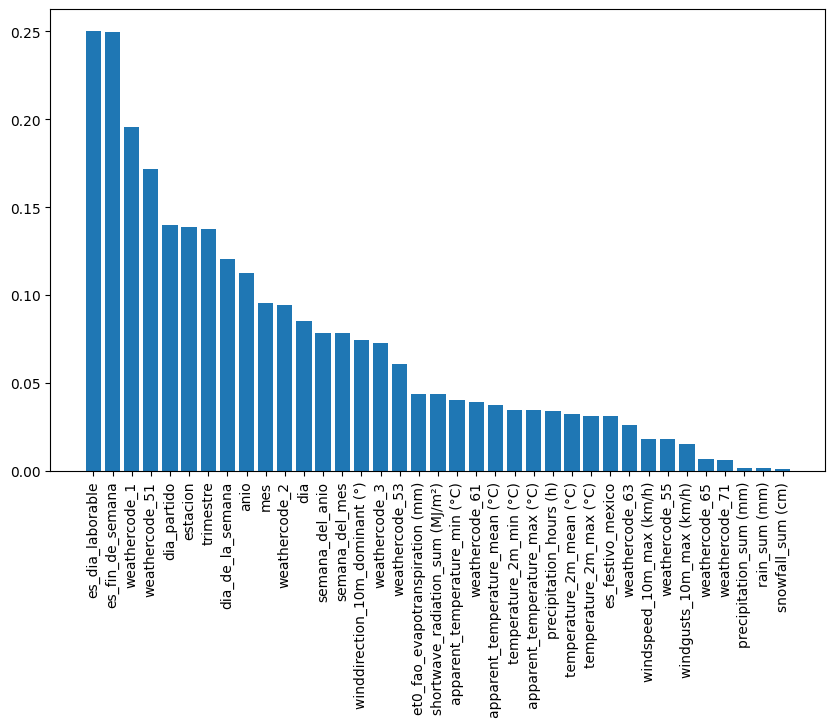

Característica: es_dia_laborable, Varianza: 0.25
Característica: es_fin_de_semana, Varianza: 0.2493180761725432
Característica: weathercode_1, Varianza: 0.19548384737176175
Característica: weathercode_51, Varianza: 0.17184067522256907
Característica: dia_partido, Varianza: 0.13991059483106458
Característica: estacion, Varianza: 0.13854910677416993
Característica: trimestre, Varianza: 0.13778453147166292
Característica: dia_de_la_semana, Varianza: 0.1204896611591027
Característica: anio, Varianza: 0.11242418021666024
Característica: mes, Varianza: 0.09533322018963328
Característica: weathercode_2, Varianza: 0.0941509104508956
Característica: dia, Varianza: 0.0853852712318596
Característica: semana_del_anio, Varianza: 0.07845749115161872
Característica: semana_del_mes, Varianza: 0.07845749115161872
Característica: winddirection_10m_dominant (°), Varianza: 0.0747532475360553
Característica: weathercode_3, Varianza: 0.07285081913445227
Característica: weathercode_53, Varianza: 0.0610221542

In [64]:
# Importa la clase MinMaxScaler de sklearn.preprocessing para normalizar las variables.
from sklearn.preprocessing import MinMaxScaler

# Crea una instancia del escalador MinMax.
scaler = MinMaxScaler()

# Normaliza las características y guarda el resultado en un nuevo DataFrame.
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Calcula las varianzas de las características
from sklearn.feature_selection import VarianceThreshold

# Define un umbral de varianza (ajusta este valor según tus necesidades).
variance_threshold = 0.01

# Crea una instancia de VarianceThreshold con el umbral de varianza especificado.
selector = VarianceThreshold(threshold=variance_threshold)

# Aplica el selector a las características normalizadas.
selected_features = selector.fit_transform(x_scaled)

# Obtén las varianzas de las características seleccionadas.
variances = selector.variances_

# Crea un nuevo DataFrame con las características seleccionadas y sus varianzas.
df_results = pd.DataFrame({'Feature': X.columns, 'Variance': variances})

# Ordena las características en función de la varianza en orden descendente.
df_results.sort_values('Variance', ascending=False, inplace=True)

# Crea una gráfica de barras para visualizar las varianzas.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(df_results['Feature'], df_results['Variance'])
plt.show()

# Imprime los resultados de varianza junto con los nombres de las características.
for feature_name, feature_variance in zip(df_results['Feature'], df_results['Variance']):
    print(f"Característica: {feature_name}, Varianza: {feature_variance}")


Observando las varianzas de las características, podemos inferir lo siguiente:

Las primeras características en la lista, como "es_dia_laborable" y "es_fin_de_semana," tienen una varianza relativamente alta debido a la normalización Min-Max que transforma sus valores en el rango [0, 1]. Sin embargo, no es apropiado evaluar la relevancia de estas características utilizando la varianza, ya que son características binarias con valores 0 y 1 y, por lo tanto, no tienen una amplia variabilidad en sus valores.

Algunas características relacionadas con el tiempo, como "shortwave_radiation_sum" y "et0_fao_evapotranspiration," también tienen una varianza significativa, lo que indica que pueden variar considerablemente en diferentes momentos y contextos.

Características relacionadas con la fecha y el tiempo, como "dia_de_la_semana," "mes," "dia," y "semana_del_anio," tienen una varianza moderada. Esto sugiere que tienen cierta variabilidad, pero no tan alta como las características mencionadas anteriormente.

Las características "precipitation_sum," "rain_sum," y "snowfall_sum" tienen una varianza extremadamente baja, lo que indica que tienen una variabilidad muy limitada y es posible que no aporten información significativa.

Características como "windgusts_10m_max," "precipitation_hours," y "temperature_2m_mean" tienen una varianza intermedia.

En resumen, es importante recordar que la varianza no es la métrica adecuada para evaluar la relevancia de características binarias, como "es_dia_laborable" y "es_fin_de_semana." Para tales características, es más apropiado utilizar otras métricas de selección de características, como pruebas de correlación o pruebas estadísticas específicas para datos binarios, para tomar decisiones más informadas sobre qué características incluir en tu modelo.

Las características con varianza extremadamente baja, como "precipitation_sum," "rain_sum," y "snowfall_sum," podrían considerarse candidatas para su eliminación, ya que tienen una variabilidad mínima y es poco probable que aporten información útil al modelo.

## Información mutua

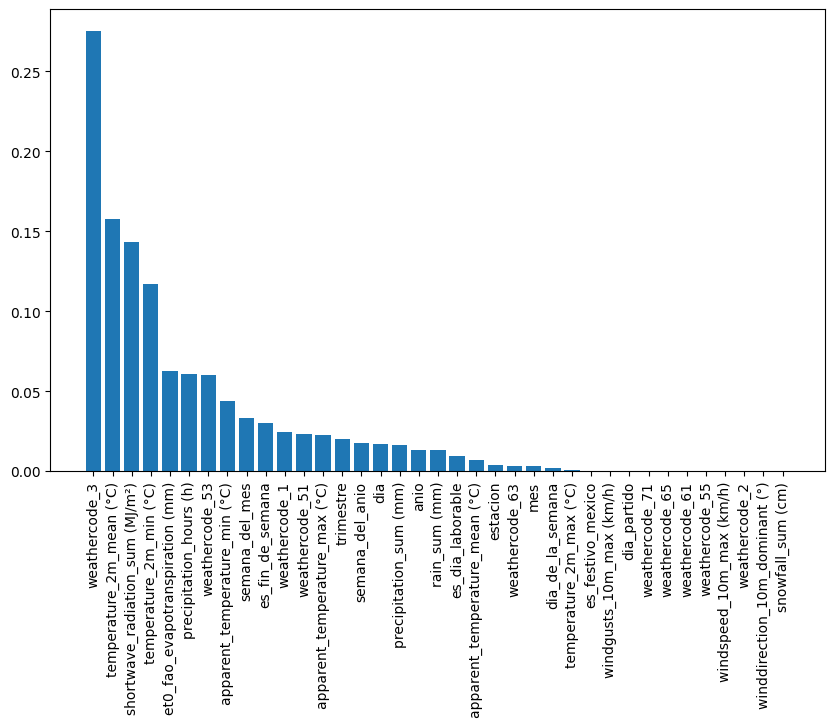

In [65]:
# Importar la biblioteca para el método de información mutua
from sklearn.feature_selection import mutual_info_regression

# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = balanced_df.drop(['time', 'count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = balanced_df['count']

# Aplicar el método de información mutua
mi = mutual_info_regression(X, Y, random_state=0)

# Asociar los valores de información mutua con las características
df_results['mi'] = mi

# Ordenar las características según la información mutua en orden descendente
df_results.sort_values('mi', ascending=False, inplace=True)

# Crear un gráfico de barras para visualizar la información mutua
plt.figure(figsize=(10, 6)) 
plt.xticks(rotation=90)
plt.bar(df_results['Feature'], df_results.mi)
plt.show()



Las característica "weathercode_3" tienen la información mutua más alta con la variable objetivo "count", lo que sugiere que podrían ser relevantes para predecirla.

## Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)

[A study on road accident prediction and contributing factors using explainable machine learning models: analysis and performance](https://www.sciencedirect.com/science/article/pii/S2590198223000611#s0045)


### Random forest (RF)

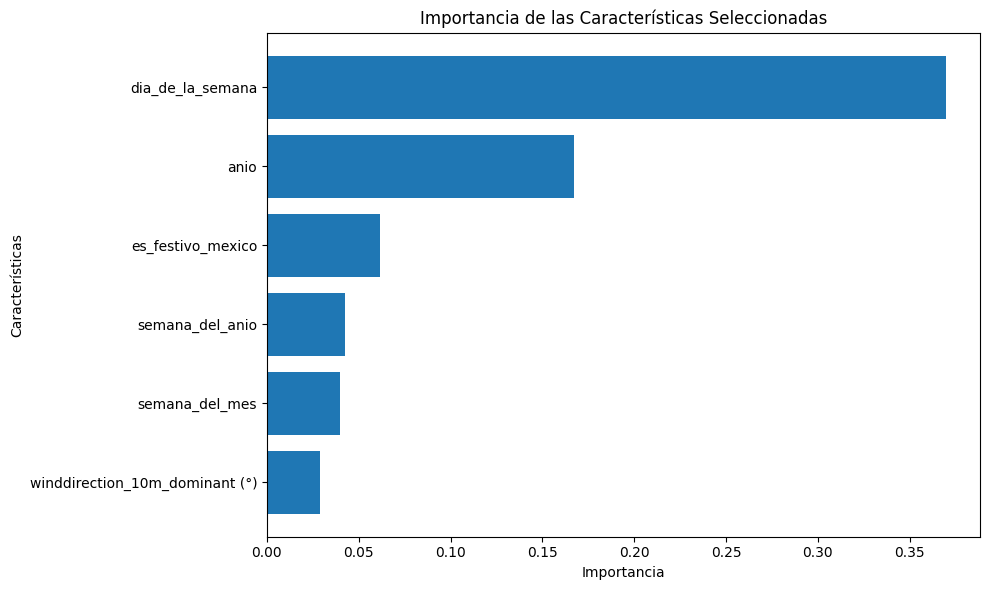

Ranking de Características:
winddirection_10m_dominant (°): 0.028942919637554878
semana_del_mes: 0.04006958924137043
semana_del_anio: 0.042400195512383665
es_festivo_mexico: 0.0616940826805067
anio: 0.16713103048412276
dia_de_la_semana: 0.3698217927517419


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Separar las características (X) y la variable objetivo (y)
X = balanced_df.drop(['time', 'count'], axis=1)
Y = balanced_df['count']

# Crear un modelo de regresión RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X, Y)

# Seleccionar las características más importantes
feature_selector = SelectFromModel(rf, prefit=True)
selected_features = X.columns[feature_selector.get_support()]
feature_importances = rf.feature_importances_[feature_selector.get_support()]

# Crear un DataFrame con las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características Seleccionadas')
plt.tight_layout()  # Ajustar el espaciado para evitar recortes en la figura
plt.show()

print("Ranking de Características:")
for feature, rank in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
    print(f"{feature}: {rank}")


Según la importancia de las características:

1. Las variables menos relevantes son `winddirection_10m_dominant (°)`, `semana_del_mes` y `semana_del_anio`. Pueden eliminarse para simplificar el modelo.

2. La característica más influyente es `dia_de_la_semana`, por lo que es crucial mantenerla.

3. `anio` y `es_festivo_mexico` también son significativas.


### Adaptive boosting (AdaBoost)

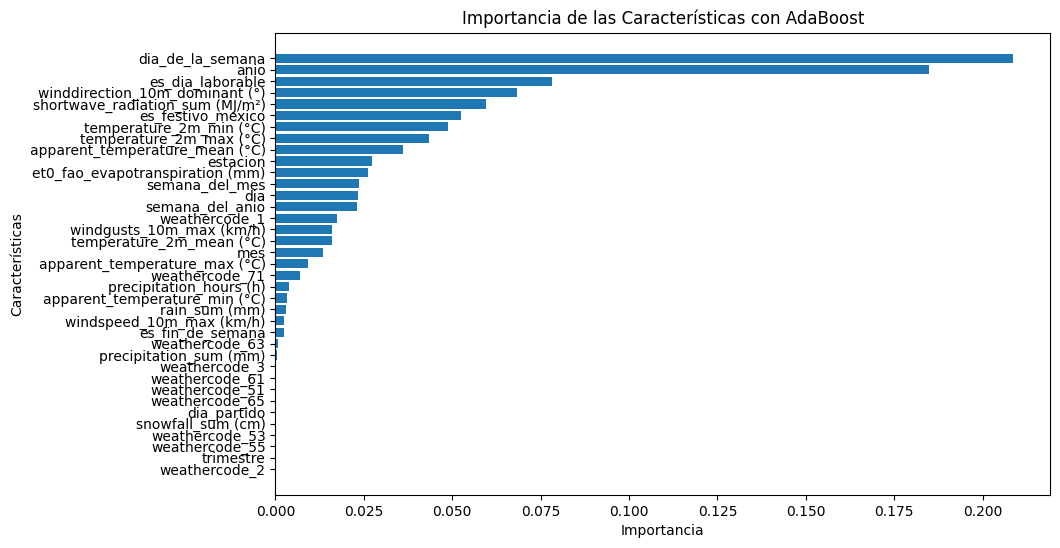

Ranking de Características:
weathercode_2: 0.0
trimestre: 0.0
weathercode_55: 0.0
weathercode_53: 0.0
snowfall_sum (cm): 0.0
dia_partido: 0.0
weathercode_65: 0.0
weathercode_51: 8.681945829327288e-05
weathercode_61: 9.97948916760497e-05
weathercode_3: 0.00013129955902399377
precipitation_sum (mm): 0.0005874895891962509
weathercode_63: 0.0006123043382695712
es_fin_de_semana: 0.0023495120403674566
windspeed_10m_max (km/h): 0.0024301321866435355
rain_sum (mm): 0.003065342144965431
apparent_temperature_min (°C): 0.0031723749379619173
precipitation_hours (h): 0.0038622622398930134
weathercode_71: 0.007031152090902648
apparent_temperature_max (°C): 0.009203715178645077
mes: 0.013402973839186176
temperature_2m_mean (°C): 0.015926797343865866
windgusts_10m_max (km/h): 0.016107342541586665
weathercode_1: 0.017553213751259594
semana_del_anio: 0.02317269786526925
dia: 0.023336075216741525
semana_del_mes: 0.023743567061003615
et0_fao_evapotranspiration (mm): 0.026165362246016174
estacion: 0.027276

In [67]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = balanced_df.drop(['time', 'count'], axis=1)
Y = balanced_df['count']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear un modelo AdaBoost para regresión
adaboost_model = AdaBoostRegressor(n_estimators=50, random_state=1)

# Entrenar el modelo con los datos de entrenamiento
adaboost_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = adaboost_model.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características con AdaBoost')
plt.show()

print("Ranking de Características:")
for feature, rank in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
    print(f"{feature}: {rank}")


Basándonos en la importancia de las características, identificamos que 'dia_de_la_semana', 'anio', y 'es_dia_laborable' son cruciales para nuestras predicciones. Algunas, como 'shortwave_radiation_sum', son importantes pero no tanto. Por otro lado, características como 'weathercode_2' tienen poca influencia y podrían eliminarse para simplificar el modelo.

### Extreme gradient boosting (XGBoost)

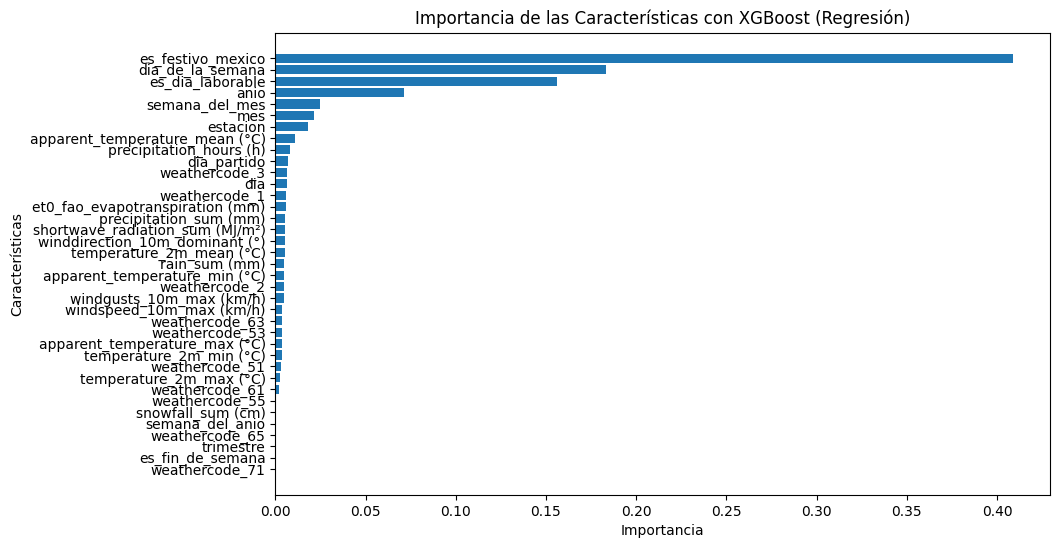

Ranking de Características:
weathercode_71: 0.0
es_fin_de_semana: 0.0
trimestre: 0.0
weathercode_65: 0.0
semana_del_anio: 0.0
snowfall_sum (cm): 0.0
weathercode_55: 0.0001293185050599277
weathercode_61: 0.002088514156639576
temperature_2m_max (°C): 0.0023082378320395947
weathercode_51: 0.00311900582164526
temperature_2m_min (°C): 0.003419572487473488
apparent_temperature_max (°C): 0.0035070329904556274
weathercode_53: 0.003594886977225542
weathercode_63: 0.0038042122032493353
windspeed_10m_max (km/h): 0.0038150667678564787
windgusts_10m_max (km/h): 0.0046903290785849094
weathercode_2: 0.00484214024618268
apparent_temperature_min (°C): 0.004859296604990959
rain_sum (mm): 0.00487663596868515
temperature_2m_mean (°C): 0.005050945095717907
winddirection_10m_dominant (°): 0.0052214921452105045
shortwave_radiation_sum (MJ/m²): 0.005243516061455011
precipitation_sum (mm): 0.005381062161177397
et0_fao_evapotranspiration (mm): 0.005608818028122187
weathercode_1: 0.0060508702881634235
dia: 0.006

In [68]:
import xgboost as xgb

# Separar las características (X) y la variable objetivo (y)
X = balanced_df.drop(['time', 'count'], axis=1)  
Y = balanced_df['count']  

# Crear un modelo XGBoost para regresión
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=1)  # Crear un modelo XGBoost con 100 estimadores y semilla aleatoria

# Entrenar el modelo con los datos
xgb_model.fit(X, Y)  # Entrenar el modelo con las características y la variable objetivo

# Obtener la importancia de las características
feature_importances = xgb_model.feature_importances_  # Calcular la importancia de las características
selected_features = X.columns  # Obtener los nombres de las características seleccionadas

# Crear un DataFrame con las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})  # Crear un DataFrame con los nombres de las características y sus importancias

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Ordenar el DataFrame por importancia en orden descendente

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características con XGBoost (Regresión)')
plt.show()  # Mostrar el gráfico de barras de la importancia de las características

print("Ranking de Características:")
for feature, rank in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
    print(f"{feature}: {rank}")



In [69]:
print(X.columns)

Index(['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
       'windgusts_10m_max (km/h)', 'winddirection_10m_dominant (°)',
       'shortwave_radiation_sum (MJ/m²)', 'et0_fao_evapotranspiration (mm)',
       'dia_de_la_semana', 'semana_del_mes', 'semana_del_anio', 'anio', 'mes',
       'dia', 'trimestre', 'es_fin_de_semana', 'es_festivo_mexico',
       'dia_partido', 'es_dia_laborable', 'estacion', 'weathercode_1',
       'weathercode_2', 'weathercode_3', 'weathercode_51', 'weathercode_53',
       'weathercode_55', 'weathercode_61', 'weathercode_63', 'weathercode_65',
       'weathercode_71'],
      dtype='object')


Los resultados de XGBoost indican que algunas características tienen poca o ninguna influencia en las predicciones, como 'weathercode_71' y 'es_fin_de_semana'. Por otro lado, 'anio', 'es_dia_laborable', 'dia_de_la_semana' y 'es_festivo_mexico' son vitales para el modelo

### Light gradient boosting (L-GBM)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2472
[LightGBM] [Info] Number of data points in the train set: 1041, number of used features: 33
[LightGBM] [Info] Start training from score 72.536984


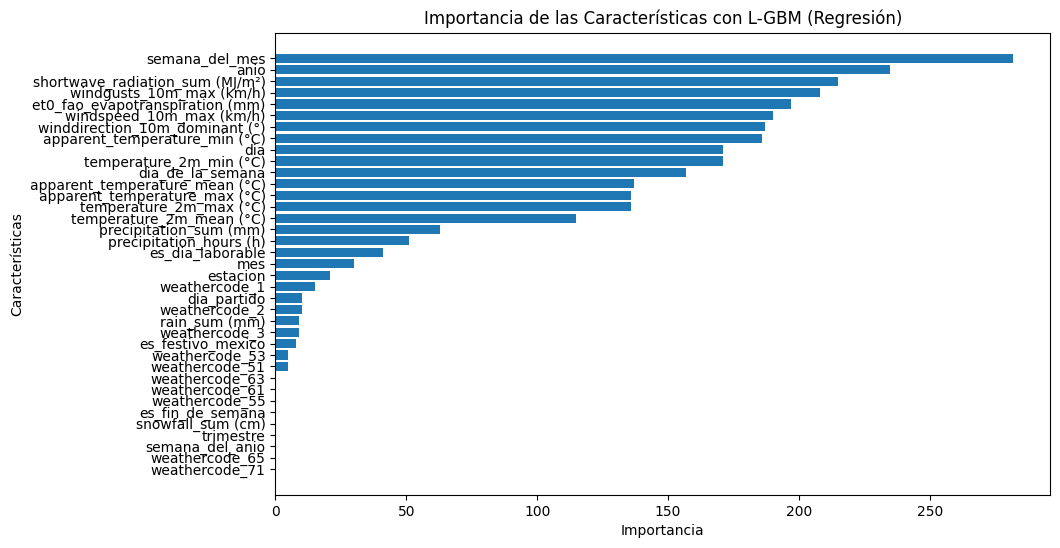

Ranking de Características:
weathercode_71: 0
weathercode_65: 0
semana_del_anio: 0
trimestre: 0
snowfall_sum (cm): 0
es_fin_de_semana: 0
weathercode_55: 0
weathercode_61: 0
weathercode_63: 0
weathercode_51: 5
weathercode_53: 5
es_festivo_mexico: 8
weathercode_3: 9
rain_sum (mm): 9
weathercode_2: 10
dia_partido: 10
weathercode_1: 15
estacion: 21
mes: 30
es_dia_laborable: 41
precipitation_hours (h): 51
precipitation_sum (mm): 63
temperature_2m_mean (°C): 115
temperature_2m_max (°C): 136
apparent_temperature_max (°C): 136
apparent_temperature_mean (°C): 137
dia_de_la_semana: 157
temperature_2m_min (°C): 171
dia: 171
apparent_temperature_min (°C): 186
winddirection_10m_dominant (°): 187
windspeed_10m_max (km/h): 190
et0_fao_evapotranspiration (mm): 197
windgusts_10m_max (km/h): 208
shortwave_radiation_sum (MJ/m²): 215
anio: 235
semana_del_mes: 282


In [70]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = balanced_df.drop(['time', 'count'], axis=1)  # X contiene las características
Y = balanced_df['count']  # Y contiene la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)  # Dividir los datos en entrenamiento y prueba

# Crear un modelo L-GBM para regresión
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=1)  # Crear un modelo LGBM con 100 estimadores y semilla aleatoria

# Entrenar el modelo con los datos de entrenamiento
lgb_model.fit(X_train, y_train)  # Entrenar el modelo con las características y la variable objetivo de entrenamiento

# Obtener la importancia de las características
feature_importances = lgb_model.feature_importances_  # Calcular la importancia de las características

# Crear un DataFrame con las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})  # Crear un DataFrame con los nombres de las características y sus importancias

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Ordenar el DataFrame por importancia en orden Ascendnete

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características con L-GBM (Regresión)')
plt.show()  # Mostrar el gráfico de barras de la importancia de las características


print("Ranking de Características:")
for feature, rank in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
    print(f"{feature}: {rank}")


Los resultados indican que muchas características tienen poca influencia (con importancia igual a cero), mientras que otras, como 'es_dia_laborable', 'precipitation_hours (h)', y 'temperature_2m_max (°C)', son vitales para el modelo. Además, 'anio', 'semana_del_mes' y 'mes' destacan como las más influyentes, resaltando la importancia del tiempo y la estacionalidad en nuestras predicciones

## Con base en tu investigación, determina las características más relevantes de tu conjunto de datos

En base a los resultados obtenidos, es evidente que los diversos modelos otorgan una mayor importancia a las variables categóricas relacionadas con la fecha, como "es_día_laborable," "día_de_la_semana," "año," y "mes," en comparación con las características meteorológicas.

Este hallazgo sugiere que, en el contexto de nuestro análisis, la información temporal y la estructura del calendario desempeñan un papel crucial en la predicción de la variable objetivo en comparación con las condiciones meteorológicas. Esto podría indicar que la temporalidad y los patrones estacionales son factores significativos en el comportamiento de la variable de interés, mientras que las características meteorológicas tienen una influencia relativamente menor.

## Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

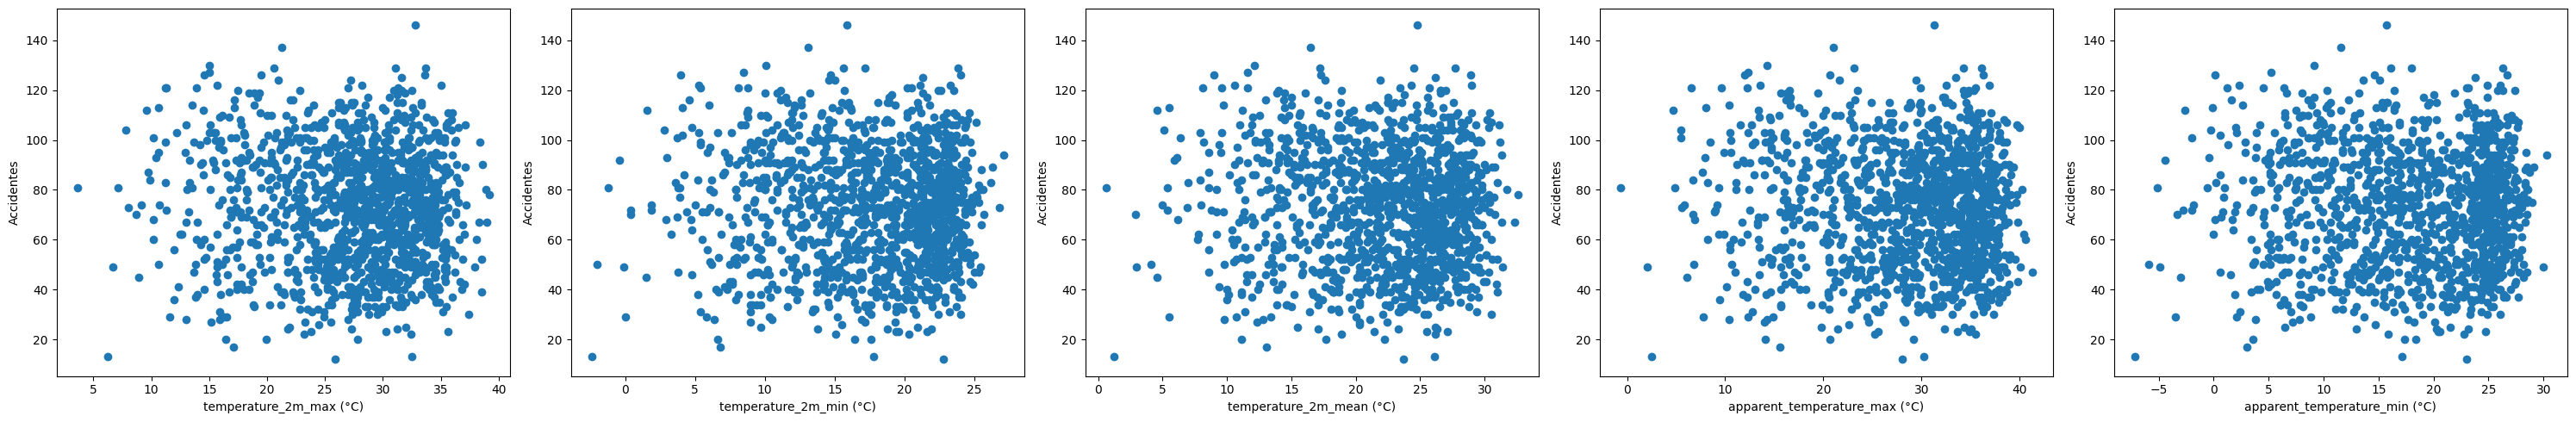

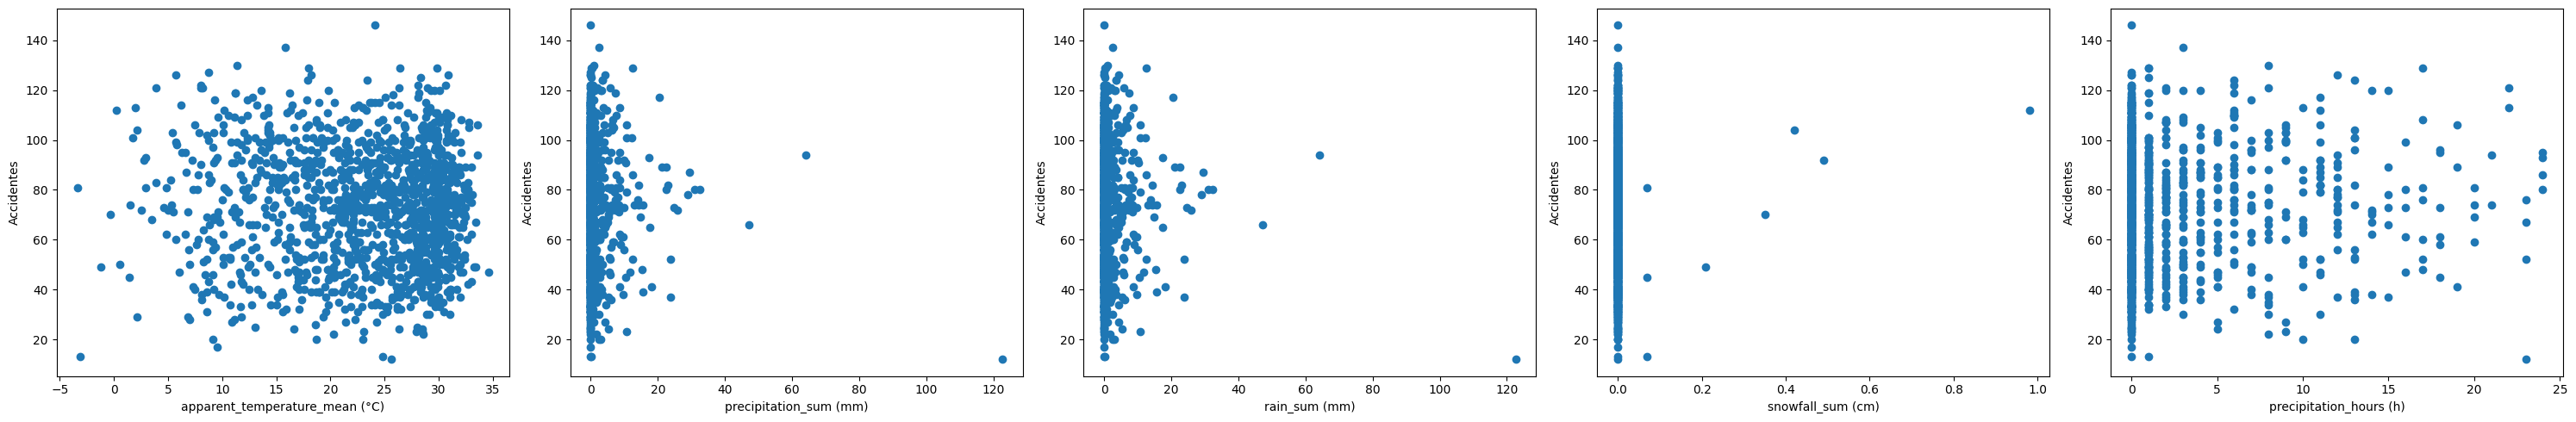

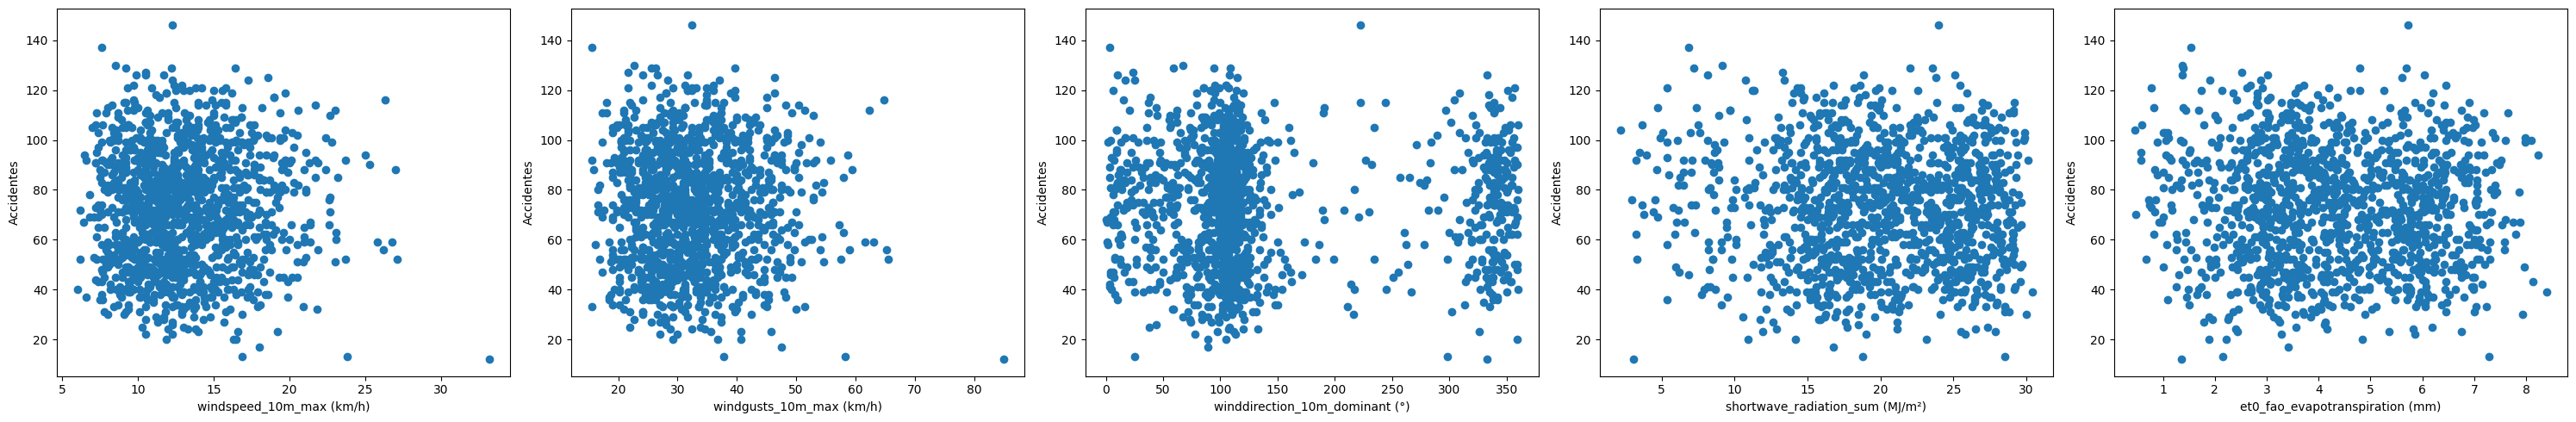

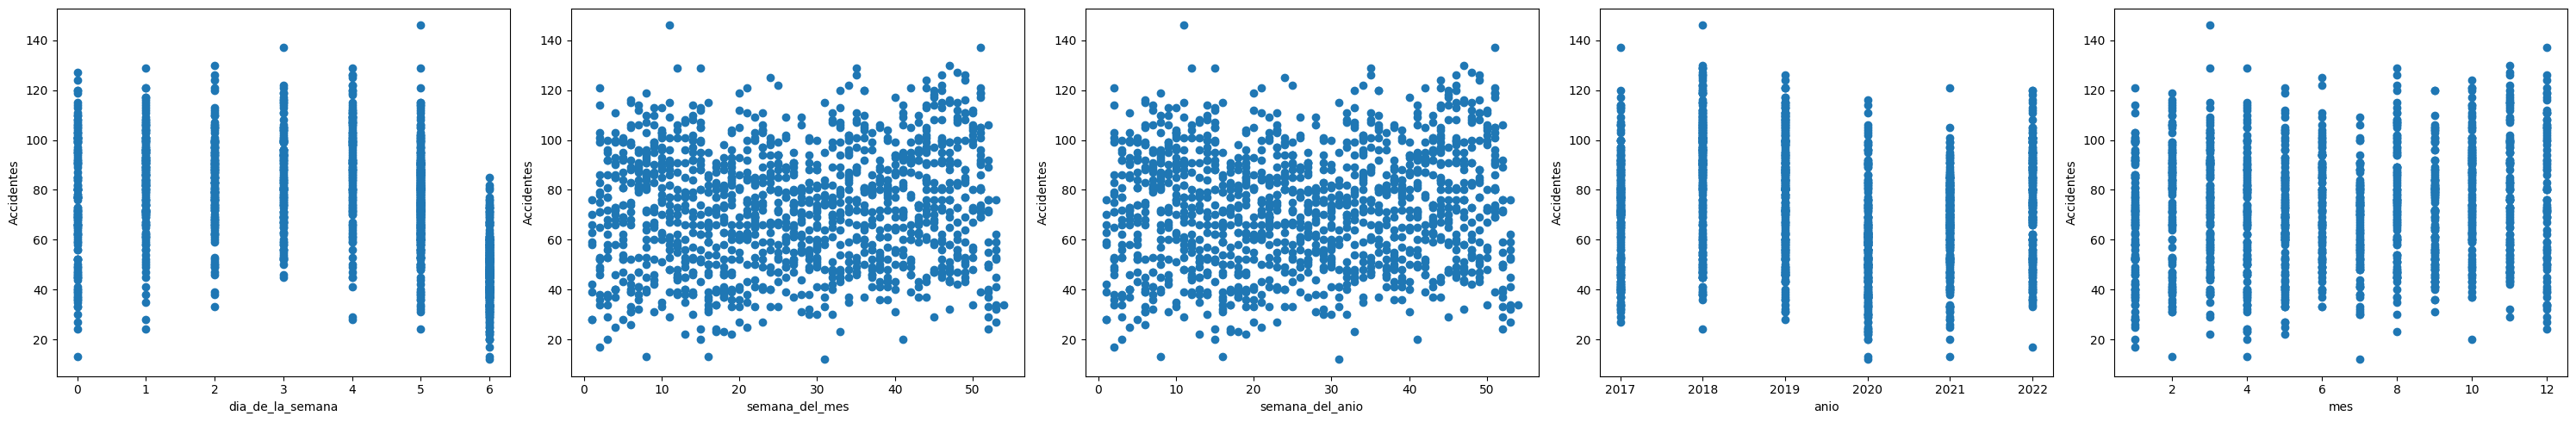

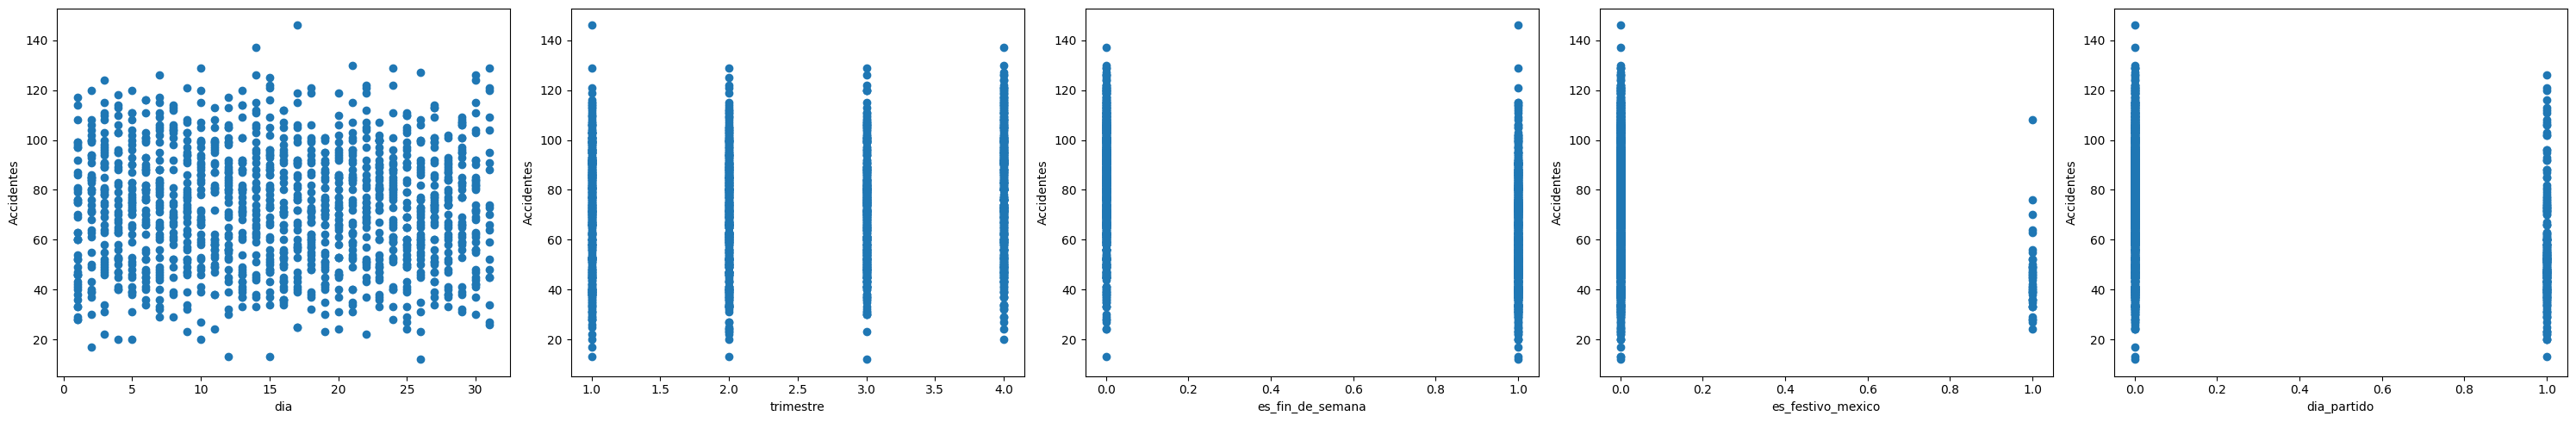

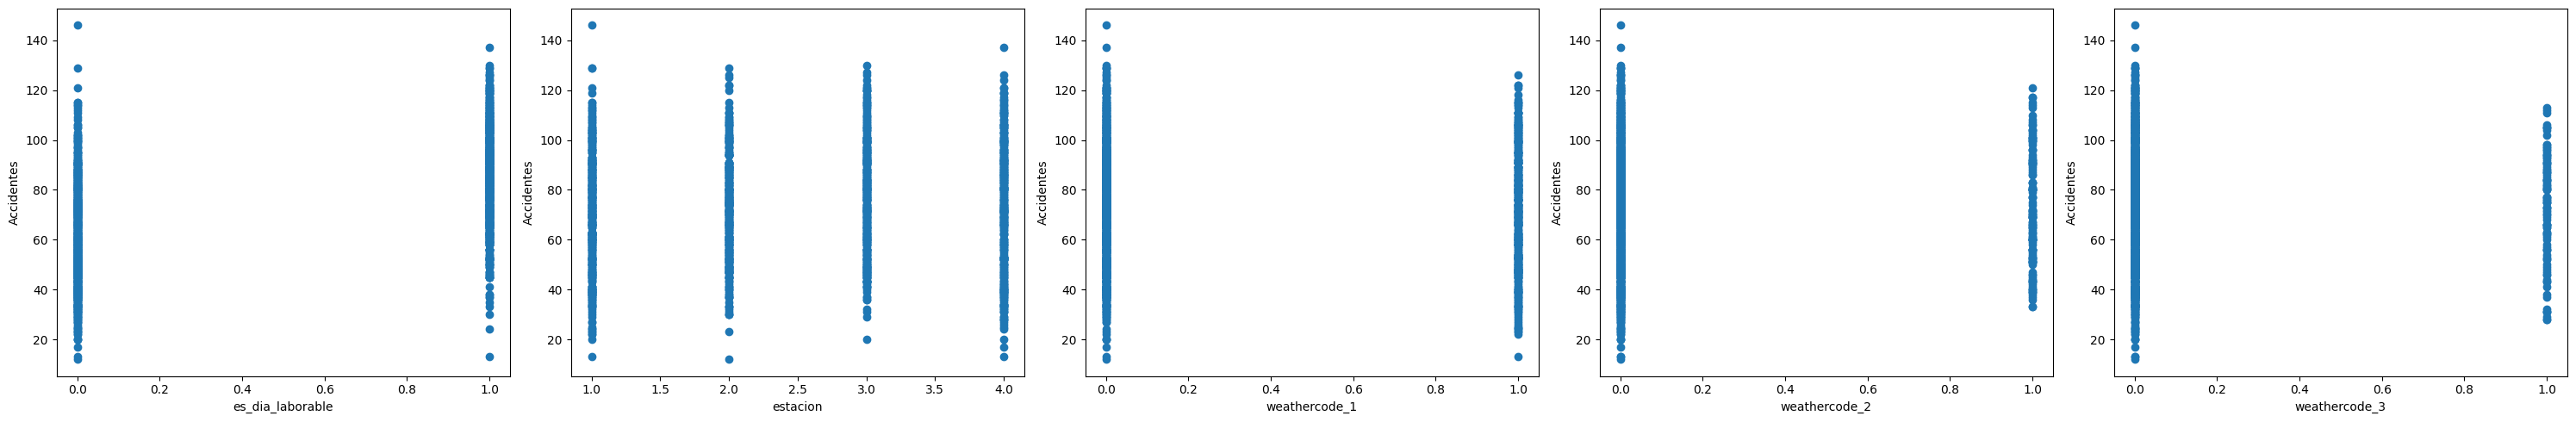

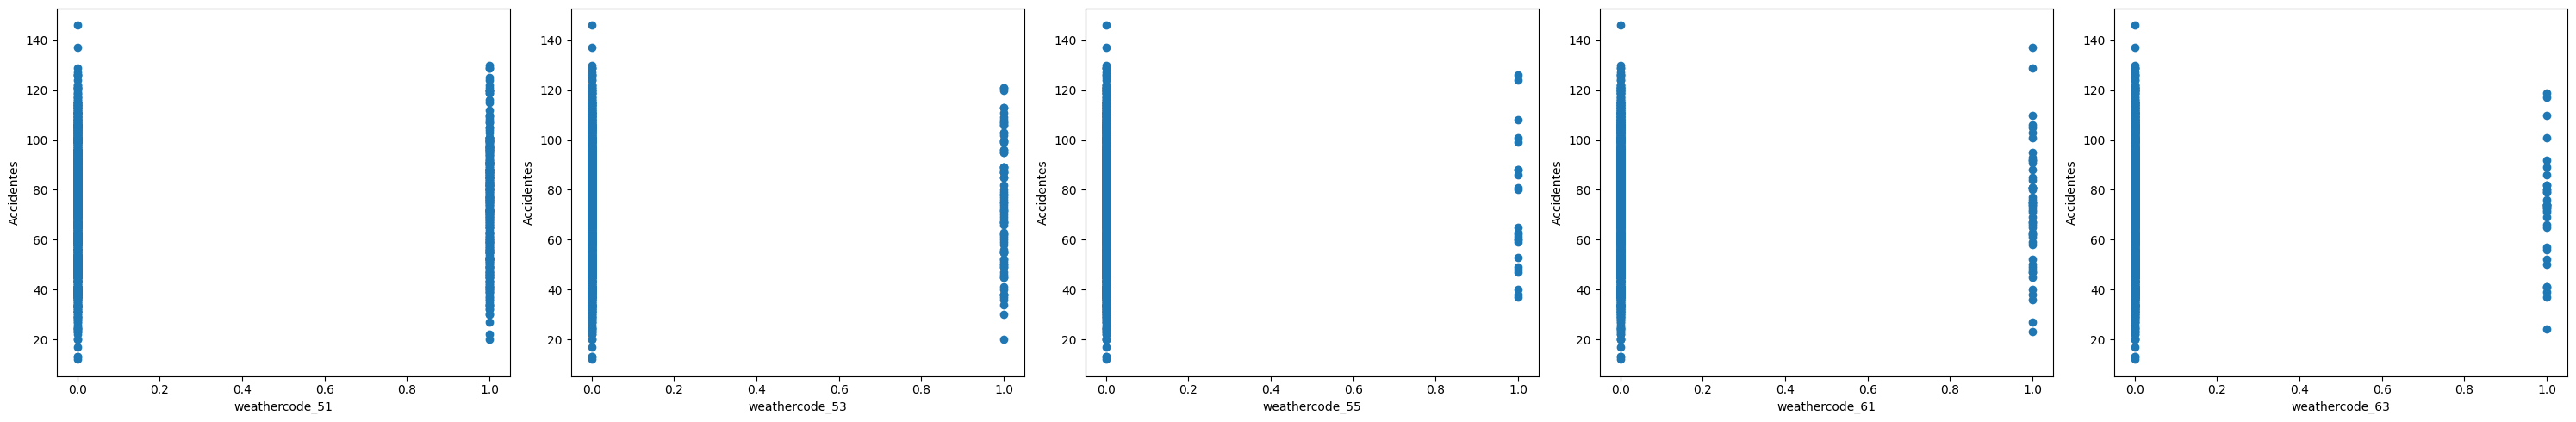

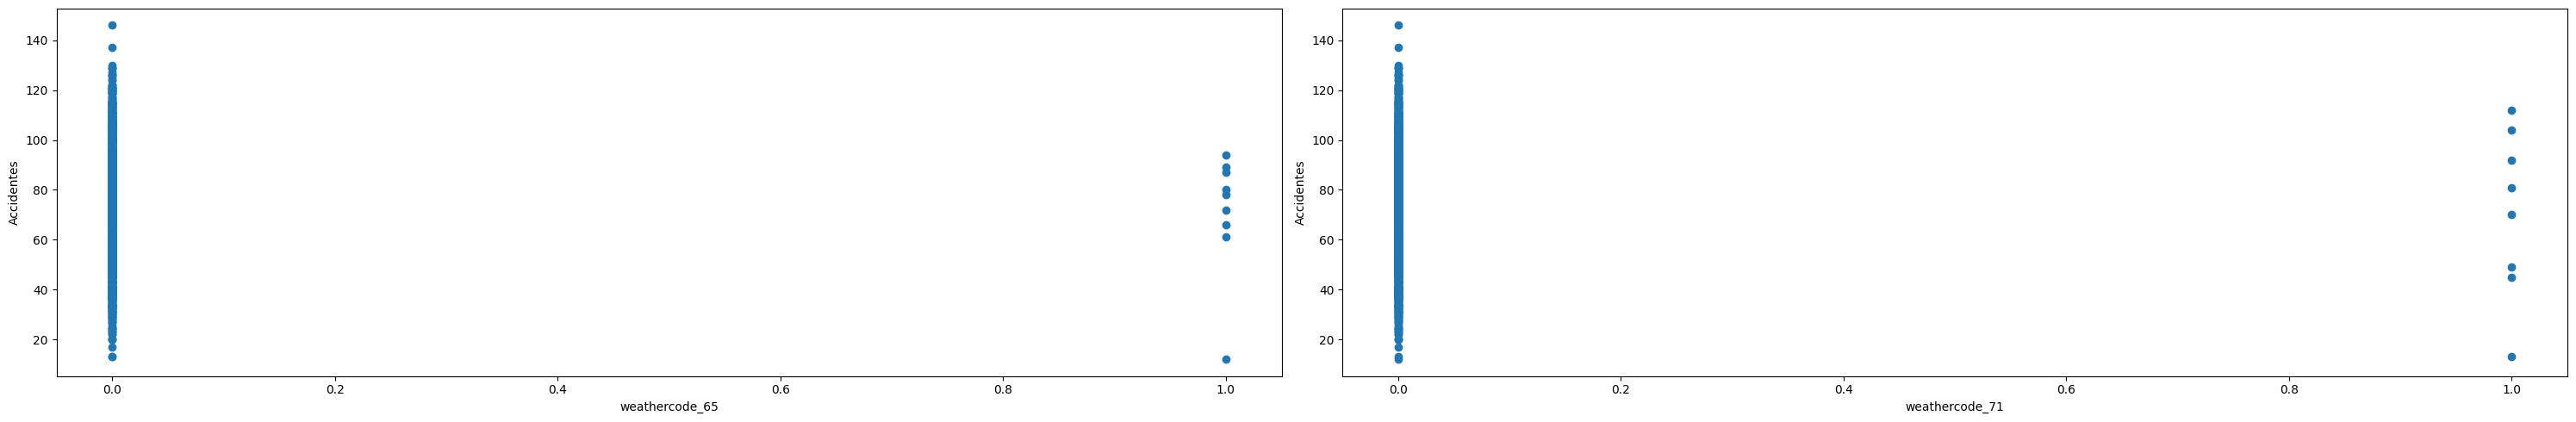

In [71]:
from IPython.display import display

# Suponiendo que ya tienes X y Y definidos

# Obtén la lista de características en X
caracteristicas = X.columns

# Configura el número de características a mostrar en cada grupo
caracteristicas_por_grupo = 5  # Ajusta este número según tus necesidades

# Divide las características en grupos
grupos_de_caracteristicas = [caracteristicas[i:i + caracteristicas_por_grupo] for i in range(0, len(caracteristicas), caracteristicas_por_grupo)]

# Configura el tamaño de la figura
fig_size = (30, 5)  # Ajusta el tamaño de la figura según tus preferencias

# Itera a través de los grupos de características y crea gráficos para cada grupo
for i, grupo in enumerate(grupos_de_caracteristicas):
    fig, axs = plt.subplots(1, len(grupo), figsize=fig_size)
    axs = axs.ravel()  # Aplana los ejes manualmente
    for j, caracteristica in enumerate(grupo):
        axs[j].scatter(X[caracteristica], Y)
        axs[j].set_xlabel(caracteristica)
        axs[j].set_ylabel('Accidentes')
        #axs[j].set_title(f'Gráfico de {caracteristica} vs. Variable Y')

    # Ajusta el espaciado entre los subplots
    plt.tight_layout()
    
    # Muestra el grupo de gráficos
    display(fig)
    plt.close()
